# Applied Machine Learning: Assignment 1

In [569]:
# understanding data

import pandas as pd
df = pd.read_csv("happiness_data.csv")


In [570]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

In [571]:
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [572]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1860.000000                1839.000000      1927.000000   
mean      0.000103                   0.747125         0.710003   
std       0.162215                   0.186789         0.107100   
min      -0.335000                   0.035000         0.322000   
25%      -0.113000                   0.690000         0.625500   
50%      -0.025500                   0.802000         0.722000   
75%       0.091000                   0.872000         0.799000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1933.000000  
mean          0.268544  
std           0.085168  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.705000

## A. How much data is present

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [574]:
''' 
we can see that data has 1949 rows and 11 columns 
lets see null values in each column
'''
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

###  What attributes/features are continuous valued? Which attributes are categorical?

In [575]:
# lets see the how many unique values each column has:

for all in df.columns:
    print(all,":" ,df[all].nunique())

Country name : 166
year : 16
Life Ladder : 1553
Log GDP per capita : 1500
Social support : 455
Healthy life expectancy at birth : 828
Freedom to make life choices : 535
Generosity : 609
Perceptions of corruption : 572
Positive affect : 431
Negative affect : 374



### From the data and the unique values we can see that country name and year seems categorical where as other columns have numeric data (floating values : continuous)


In [576]:
# since we don't need year and life ladder attributes:

df.drop(["year","Life Ladder","Country name"], axis= 1, inplace= True)

In [577]:
df.columns

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

## B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.

In [578]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 7

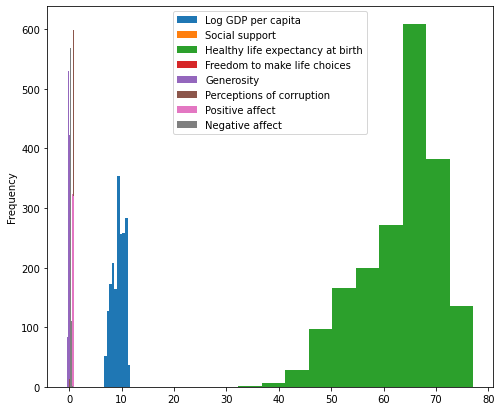

In [579]:
for all in df.columns:
  if all!="Country name":
    df[all].plot(kind="hist", label=all)
    plt.legend(loc="upper center")

array([[<AxesSubplot:title={'center':'Log GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy at birth'}>],
       [<AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>],
       [<AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative affect'}>, <AxesSubplot:>]],
      dtype=object)

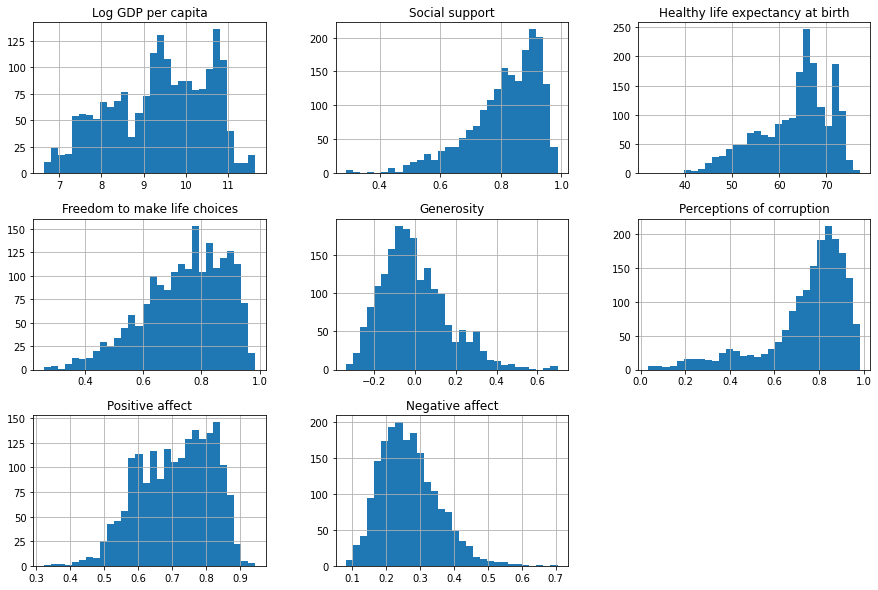

In [580]:

X="Healthy life expectancy at birth"
Y = list(df.columns)
# Y.remove("Country name")
Y.remove("Healthy life expectancy at birth")

df.hist(bins=30, figsize=(15, 10))

### Explain  noticeable  traits  for  key attributes. 

#### We can see that Social Support, Generosity and perceptions of corruptions form a normal distribution. The data also has noticeble outliers where the frequency dimishes greatly. These values can be removed from the data

In [581]:
# we saw that there were null values, lets remove them and see what the graphs look like

df.dropna(how='any', inplace=True)
df.isnull().sum()

Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1948
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1708 non-null   float64
 1   Social support                    1708 non-null   float64
 2   Healthy life expectancy at birth  1708 non-null   float64
 3   Freedom to make life choices      1708 non-null   float64
 4   Generosity                        1708 non-null   float64
 5   Perceptions of corruption         1708 non-null   float64
 6   Positive affect                   1708 non-null   float64
 7   Negative affect                   1708 non-null   float64
dtypes: float64(8)
memory usage: 120.1 KB


array([[<AxesSubplot:title={'center':'Log GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy at birth'}>],
       [<AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>],
       [<AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative affect'}>, <AxesSubplot:>]],
      dtype=object)

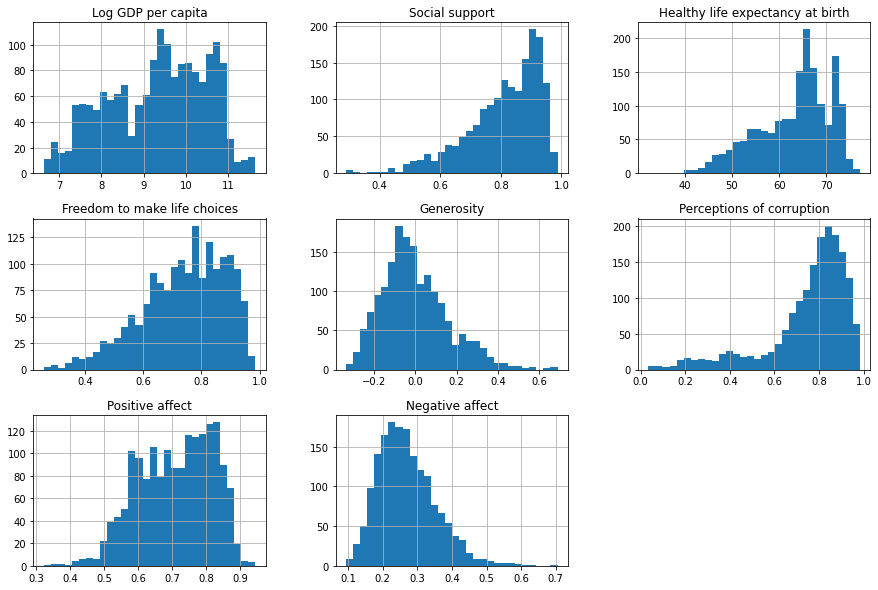

In [583]:
df.hist(bins=30, figsize=(15, 10))

###  Are  there  any  attributes  that  might  require  special  treatment?  If  so,  what  special treatment might they require?

#### Yes, we can remove the outliers from the data and we can one hot encode all our categorical values. We also normalise all our continuous variables

### Removing the outliers from our dataset

In [584]:
df = df[df['Social support'] >=0.45]
df = df[df['Healthy life expectancy at birth'] >= 45]
df = df[df['Healthy life expectancy at birth'] <= 75]
df = df[df['Freedom to make life choices'] >= 0.4]
df = df[df['Generosity'] <= 0.4]
df = df[df['Perceptions of corruption'] >= 0.2]
df = df[df['Positive affect'] >= 0.45]
df = df[df['Positive affect'] <= 0.9]
df = df[df['Negative affect'] >= 0.1]
df = df[df['Negative affect'] <= 0.5]

In [585]:
# we can see that there isn't much difference in histograms after removing rows will null values

df.describe()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         1540.000000     1540.000000                       1540.000000   
mean             9.373544        0.820155                         63.662490   
std              1.120945        0.109934                          7.231506   
min              6.635000        0.451000                         45.100000   
25%              8.483750        0.754000                         59.000000   
50%              9.517500        0.843000                         65.301500   
75%             10.299250        0.909250                         68.800000   
max             11.648000        0.985000                         75.000000   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   1540.000000  1540.000000                1540.000000   
mean                       0.746753    -0.013208                   0.759767   
std                        0.130862     0.147901                   0.169185   
min                        0.410000    -0.335000                   0.203000   
25%                        0.652000    -0.119250                   0.703000   
50%                        0.759000    -0.033000                   0.808000   
75%                        0.850000     0.079250                   0.875000   
max                        0.985000     0.391000                   0.983000   

       Positive affect  Negative affect  
count      1540.000000      1540.000000  
mean          0.713867         0.265853  
std           0.101986         0.075292  
min           0.450000         0.103000  
25%           0.633000         0.209000  
50%           0.726000         0.256000  
75%           0.802000         0.314000  
max           0.900000         0.496000

## C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. 

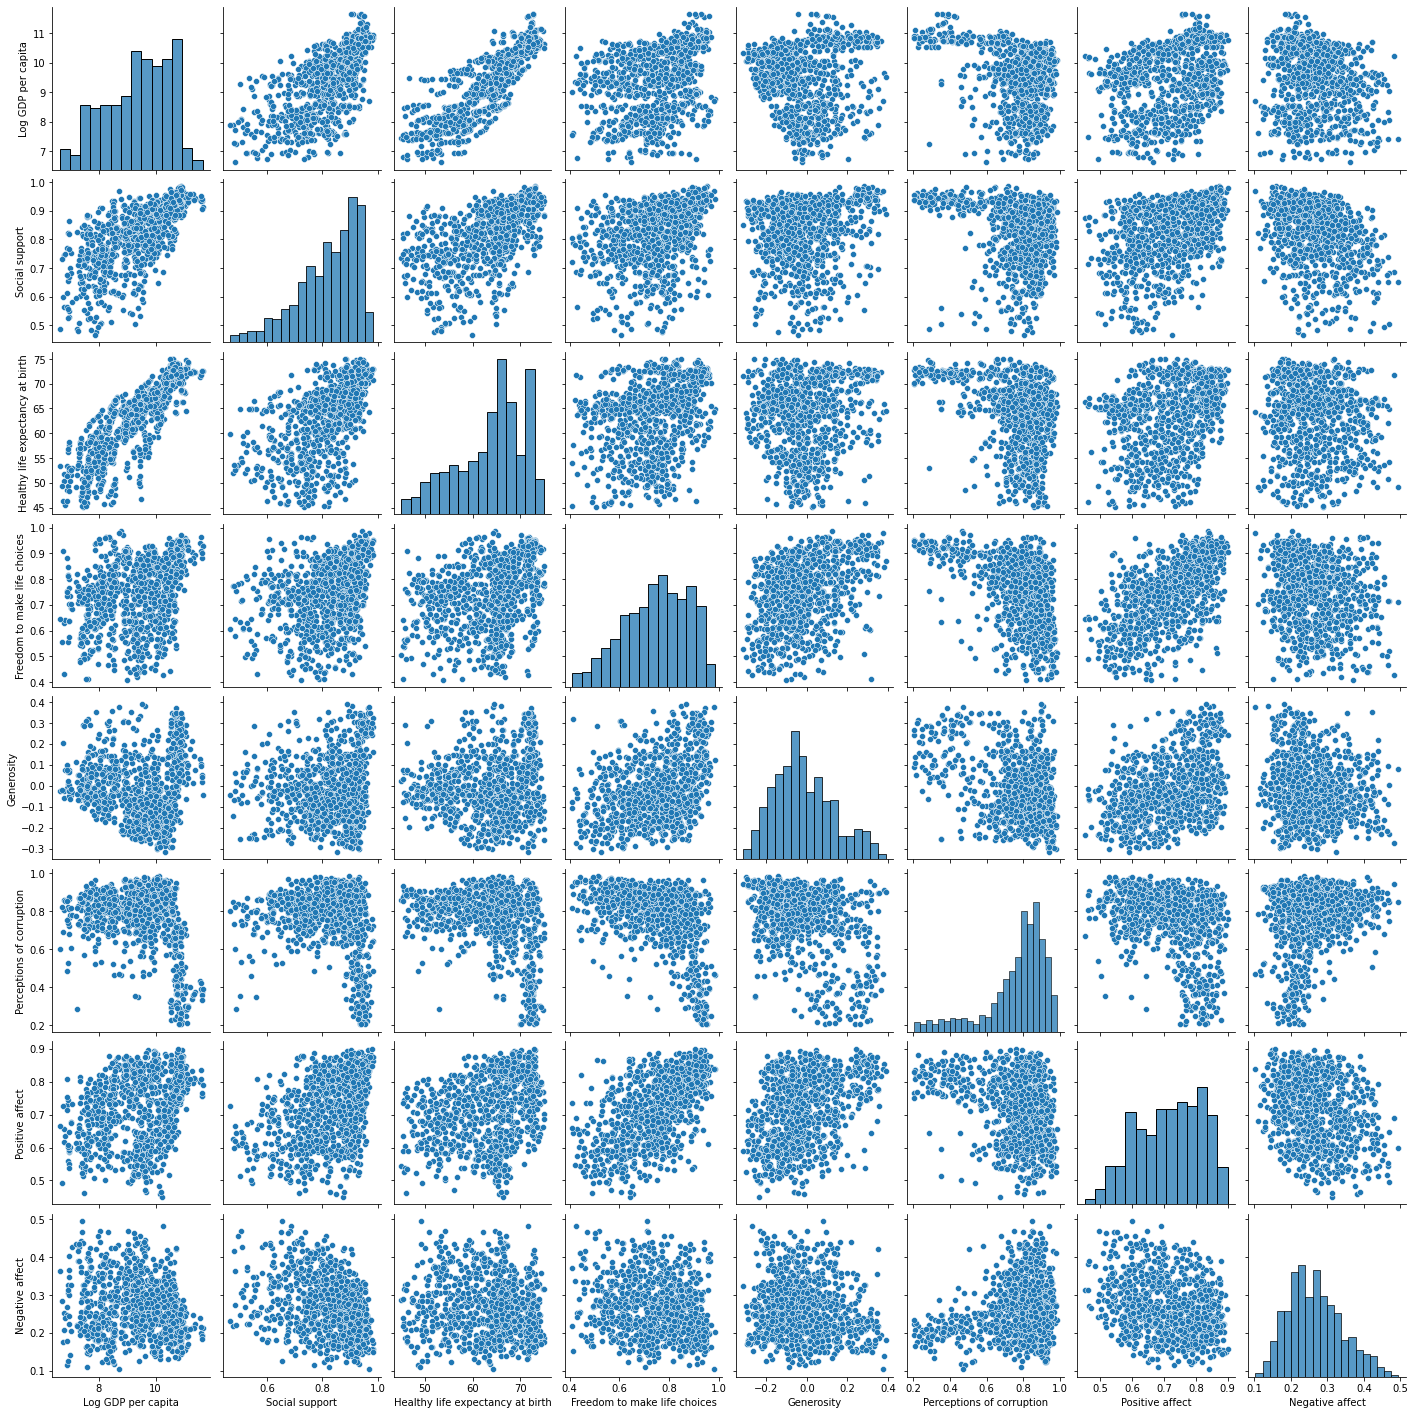

In [586]:
import seaborn as sns
sns.pairplot(df.sample(1000))

<AxesSubplot:>

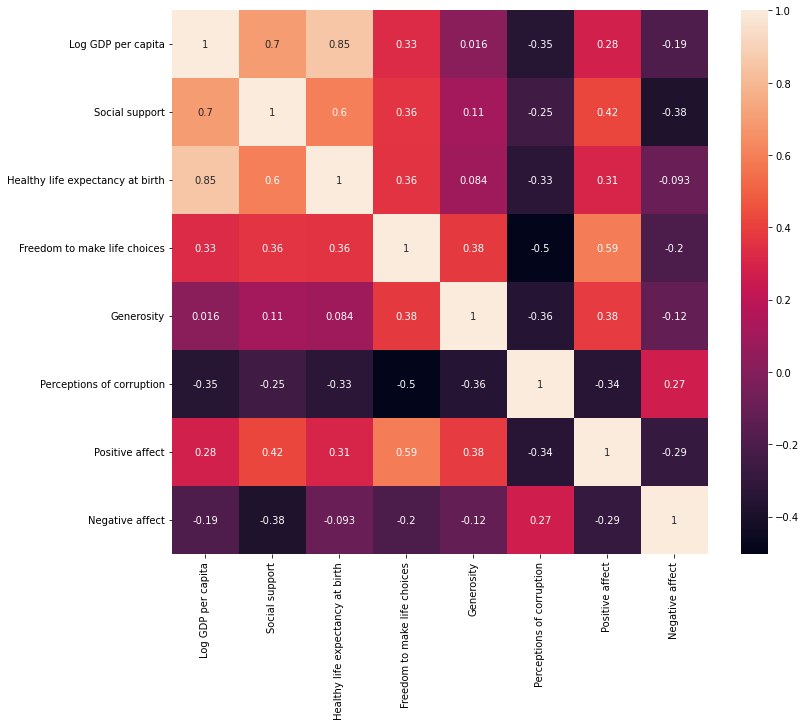

In [587]:
import numpy as np
tempdf = df.copy()
# tempdf.drop(["Country name"], axis= 1, inplace= True)

corr = tempdf.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True)

In [588]:
from scipy.stats import pearsonr

prsnr=[]
for all in tempdf.columns:
  if all != 'Healthy life expectancy at birth':
    corr, _ = pearsonr(tempdf[all], tempdf['Healthy life expectancy at birth'])
    prsnr.append((all,corr))

prsnr

[('Log GDP per capita', 0.8529664073676991),
 ('Social support', 0.6001610852923753),
 ('Freedom to make life choices', 0.3562993562580183),
 ('Generosity', 0.0841728962610643),
 ('Perceptions of corruption', -0.3274972784568217),
 ('Positive affect', 0.3067444975902276),
 ('Negative affect', -0.09260764352236764)]

### Normalising the data

In [589]:
def z_score_normalizer(X):
    X_mean = np.mean(X)
    X_std = np.std(X)
    X_scaled = (X - X_mean) / X_std
    return X_scaled

In [590]:
df.columns

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [591]:
for col in ['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices','Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect']:
    df[col] = z_score_normalizer(df[col])
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler


# # Convert categorical variables into numerical representation
# df = pd.get_dummies(df, columns=["Country name"])

# x = df.drop(['Healthy life expectancy at birth'], axis=1).values
# y = df['Healthy life expectancy at birth'].values

# # Normalize/Standardize the features
# from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)
# df_scaled

## D. Select  20%  of  the  data  for  testing.  Describe  how  you  did  that  and  verify  that  your  test portion of the data is representative of the entire dataset.

### We use sklearn's train_test_split to randomly pick 20% of our dataset as the test set and the remaining 80 as training set

In [604]:
# df = pd.get_dummies(df, columns=["Country name"])
X = df.drop(columns=['Healthy life expectancy at birth'],axis=1)
y = df['Healthy life expectancy at birth']



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [605]:
def histogram(df):
    for col in df.columns:
        ax = sns.histplot(df,x = col,kde=False)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.show()

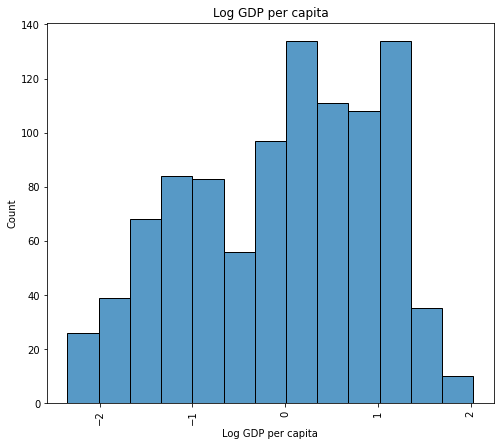

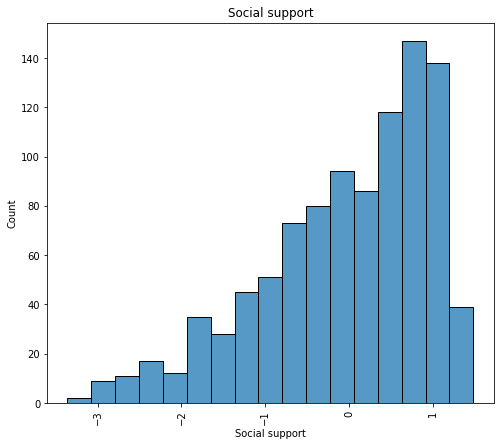

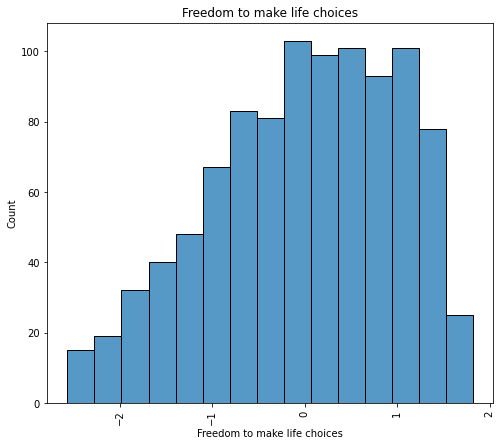

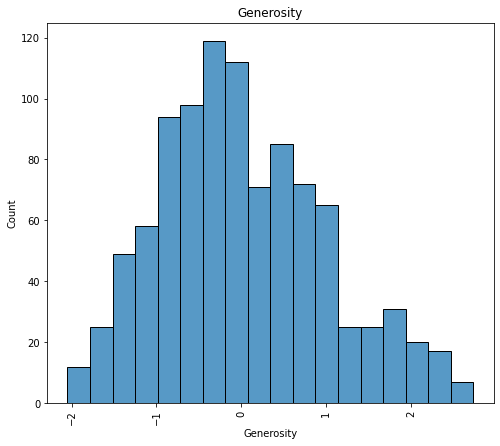

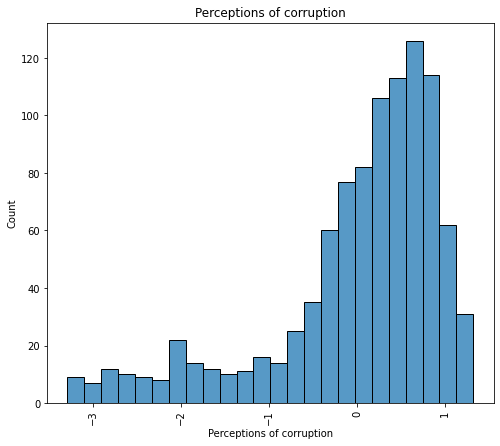

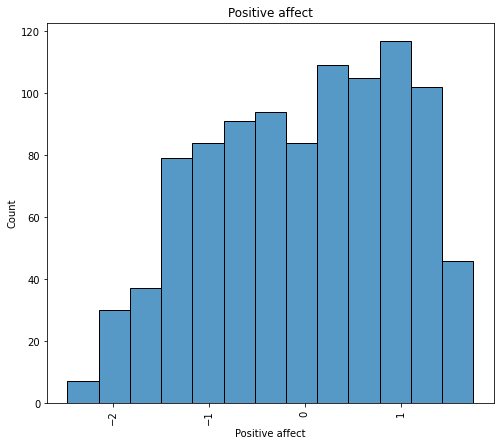

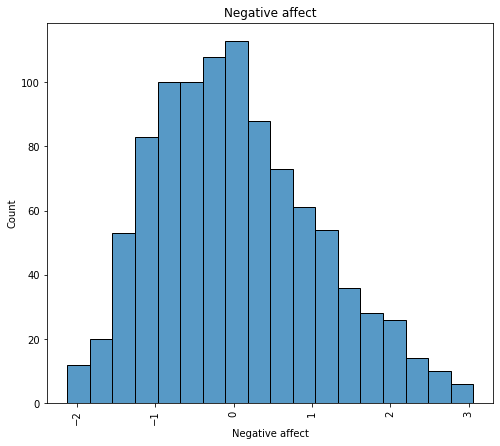

In [594]:
histogram(x_train)

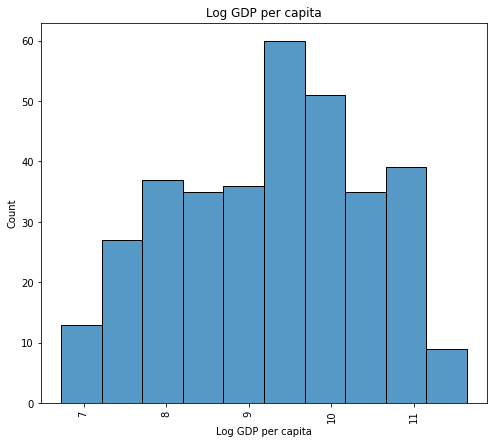

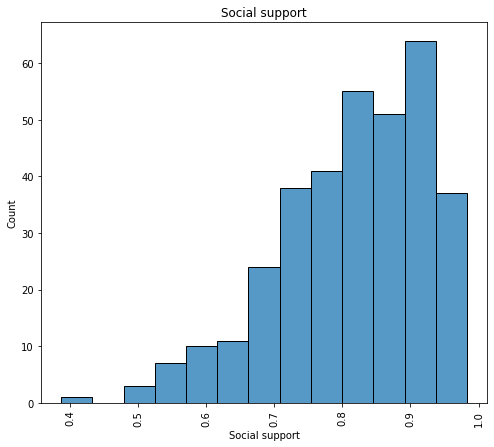

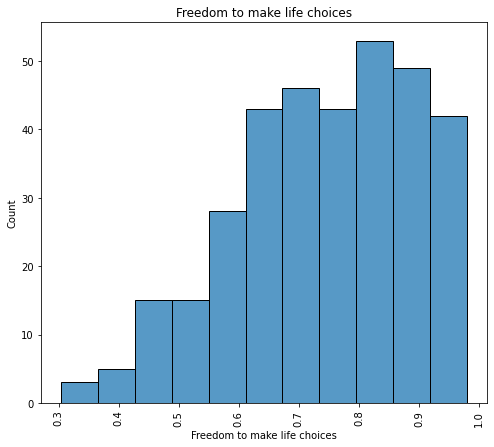

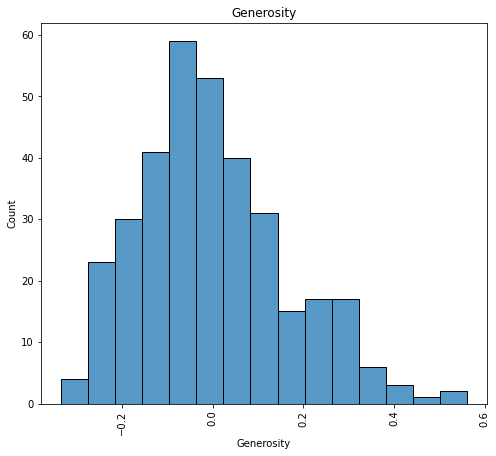

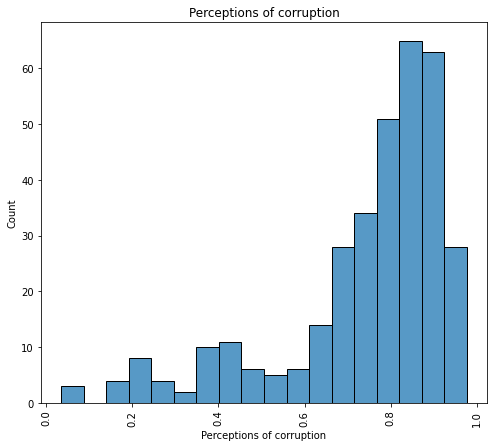

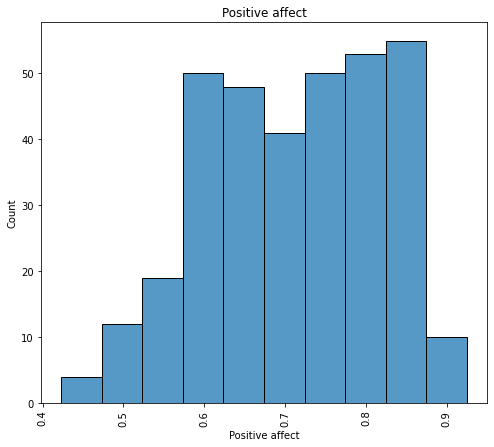

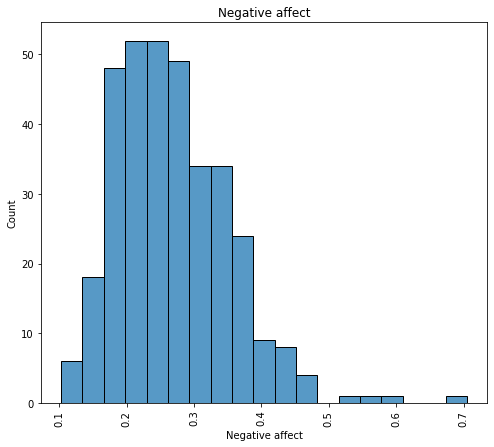

In [595]:
histogram(X_test)

#### The histograms for the features have the same distribution hence we can say that train_test_split creates a test set that is a good representation of the train set

## E. Train  a  Linear  Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric

### Defining a Function for Epochs vs training error plot

In [606]:
def plottrainingerror(trainloss,valloss):
    plt.plot(np.sqrt(trainloss), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(validation_errors), "b-", linewidth=2, label="validation")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("iteration", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

In [607]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=4)

train_mse=[]
val_mse = []
model = LinearRegression()
# Divide the data into 4 folds
for train_index, val_index in kf.split(x_train):
    X_train_cv, X_val = x_train.iloc[train_index], x_train.iloc[val_index]
    Y_train_cv, Y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    # Fit a linear regression model using normal equation/SVD
    model.fit(X_train_cv, Y_train_cv)
    y_pred = model.predict(X_val)
    val_mse.append(mean_squared_error(Y_val, y_pred))
    train_mse.append(mean_squared_error(Y_train_cv,model.predict(X_train_cv)))

np.sqrt(np.mean(train_mse)), np.sqrt(np.mean(val_mse))

(0.4979102006522675, 0.5029184603559176)

In [608]:
train_mse[-1], val_mse[-1]

(0.24000925881795512, 0.27635499566040955)

In [609]:


from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_val)

r2 = r2_score(y_val, y_pred)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2, rmse

(0.6709712373716512, 0.5155888391224287)

### Linear regression using SVD

Val Root Mean Squared Error: 0.5155450612622829


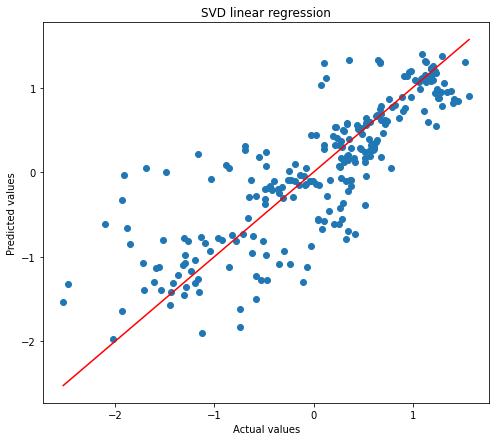

In [611]:




from sklearn.model_selection import train_test_split
# x: input data matrix
# y: target data 



U, s, V = np.linalg.svd(x_train, full_matrices=False)
weights = V.T @ np.diag(1/s) @ U.T @ y_train

y_pred = x_val @ weights

val_mse = np.mean((y_pred - y_val)**2)

print("Val Root Mean Squared Error:", np.sqrt(val_mse))

plt.scatter(y_val, y_pred)
x_line = np.array([y_val.min(), y_val.max()])
y_line = x_line
plt.plot(x_line, y_line, 'r')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('SVD linear regression')
plt.show()

### SGD with different batch sizes and learning rates

for batch size: 32 iterations: 10


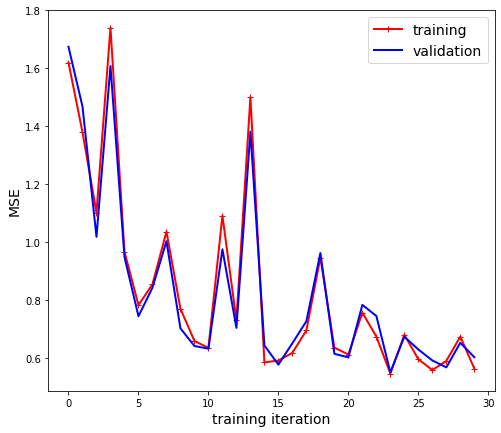

for batch size: 64 iterations: 10


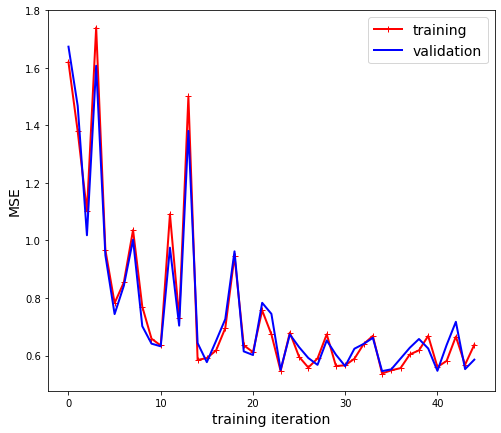

for batch size: 128 iterations: 10


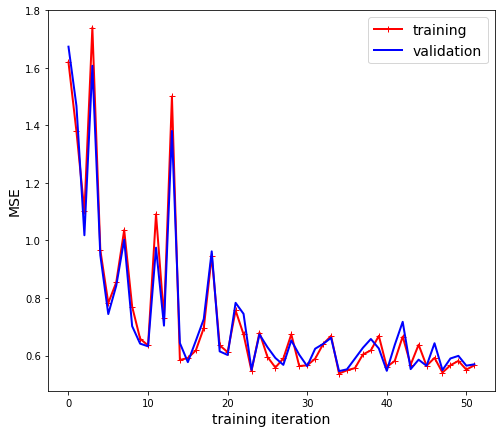

0.7845844035913263 0.7785404865622044
for batch size: 32 iterations: 100


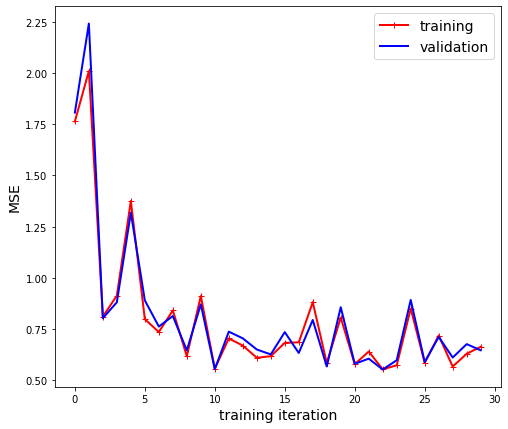

for batch size: 64 iterations: 100


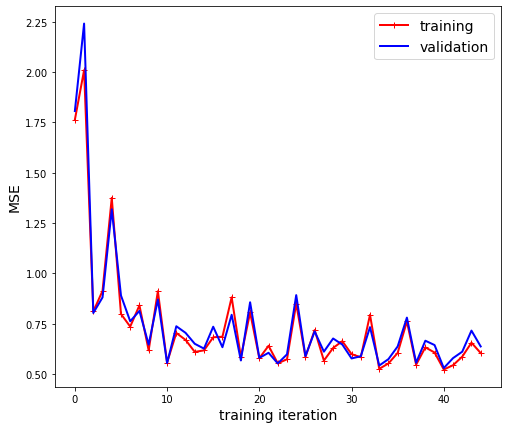

for batch size: 128 iterations: 100


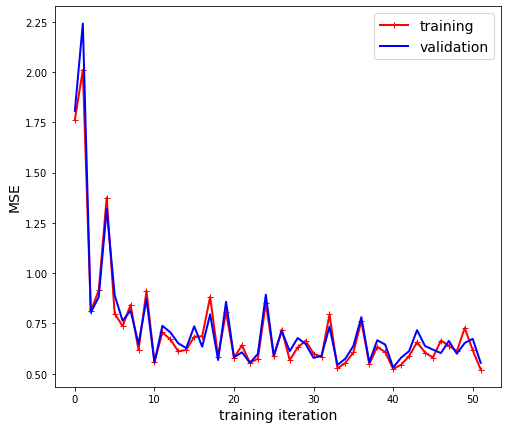

0.7703120080426037 0.789307631121088
for batch size: 32 iterations: 1000


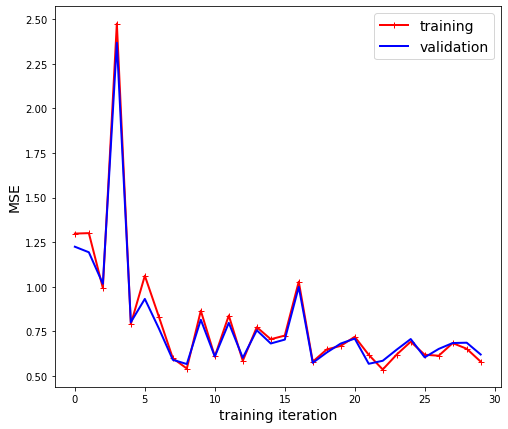

for batch size: 64 iterations: 1000


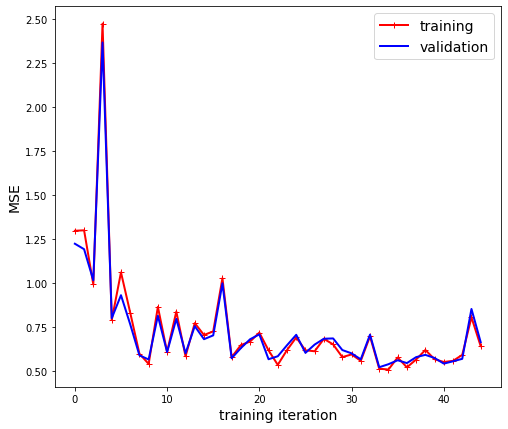

for batch size: 128 iterations: 1000


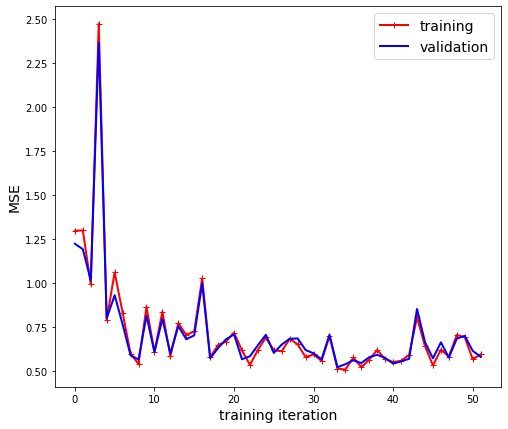

0.7809981059922604 0.7668209743352546


In [613]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import scale



its = [10,100,1000]
for all in its:
    sgd_reg = SGDRegressor(max_iter=all, eta0=0.5)
    batchs = [32,64,128]
    training_errors = []
    validation_errors = []
    for batch_size in batchs:
        print("for batch size:", batch_size, "iterations:",all)
        num_batches = x_train.shape[0] // batch_size
        for i in range(num_batches):
            x_batch = x_train[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]

        # Fit a linear regression model using SGD
            sgd_reg.partial_fit(x_batch, y_batch)
            y_train_pred = sgd_reg.predict(x_train)
            y_val_pred = sgd_reg.predict(x_val)
            training_errors.append(mean_squared_error(y_train_pred, y_train))
            validation_errors.append(mean_squared_error(y_val_pred, y_val))

    # Plot the training and validation error as a function of training iterations
        plt.plot(np.sqrt(training_errors), "r-+", linewidth=2, label="training")
        plt.plot(np.sqrt(validation_errors), "b-", linewidth=2, label="validation")
        plt.legend(loc="upper right", fontsize=14)
        plt.xlabel("training iteration", fontsize=14)
        plt.ylabel("MSE", fontsize=14)
        plt.show()

    print(np.sqrt(np.mean(training_errors)), np.sqrt(np.mean(validation_errors)))

### Ridge, Lasso and Elastic net with different penalties

In [540]:
def regularization(x_train, y_train,x_val,y_val, alpha, learning_rate, num_folds=4, num_iterations=100, penalty=None):
    
    model = SGDRegressor(penalty=penalty, eta0 = learning_rate, alpha=alpha, max_iter=num_iterations, warm_start=True)
    train_loss = []
    val_loss = []
    iteration = []
    for i in range(num_iterations):
        #X_train, y_train = shuffle(X_train,y_train)
        model.partial_fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_val = model.predict(x_val)
        train_loss.append(mean_squared_error(pred_train, y_train))
        val_loss.append(mean_squared_error(pred_val, y_val))
        iteration.append(i)
    return np.sqrt(train_loss), np.sqrt(val_loss)

For learning rate,0.1
For learning rate,0.5
For learning rate,0.8
For learning rate,0.9


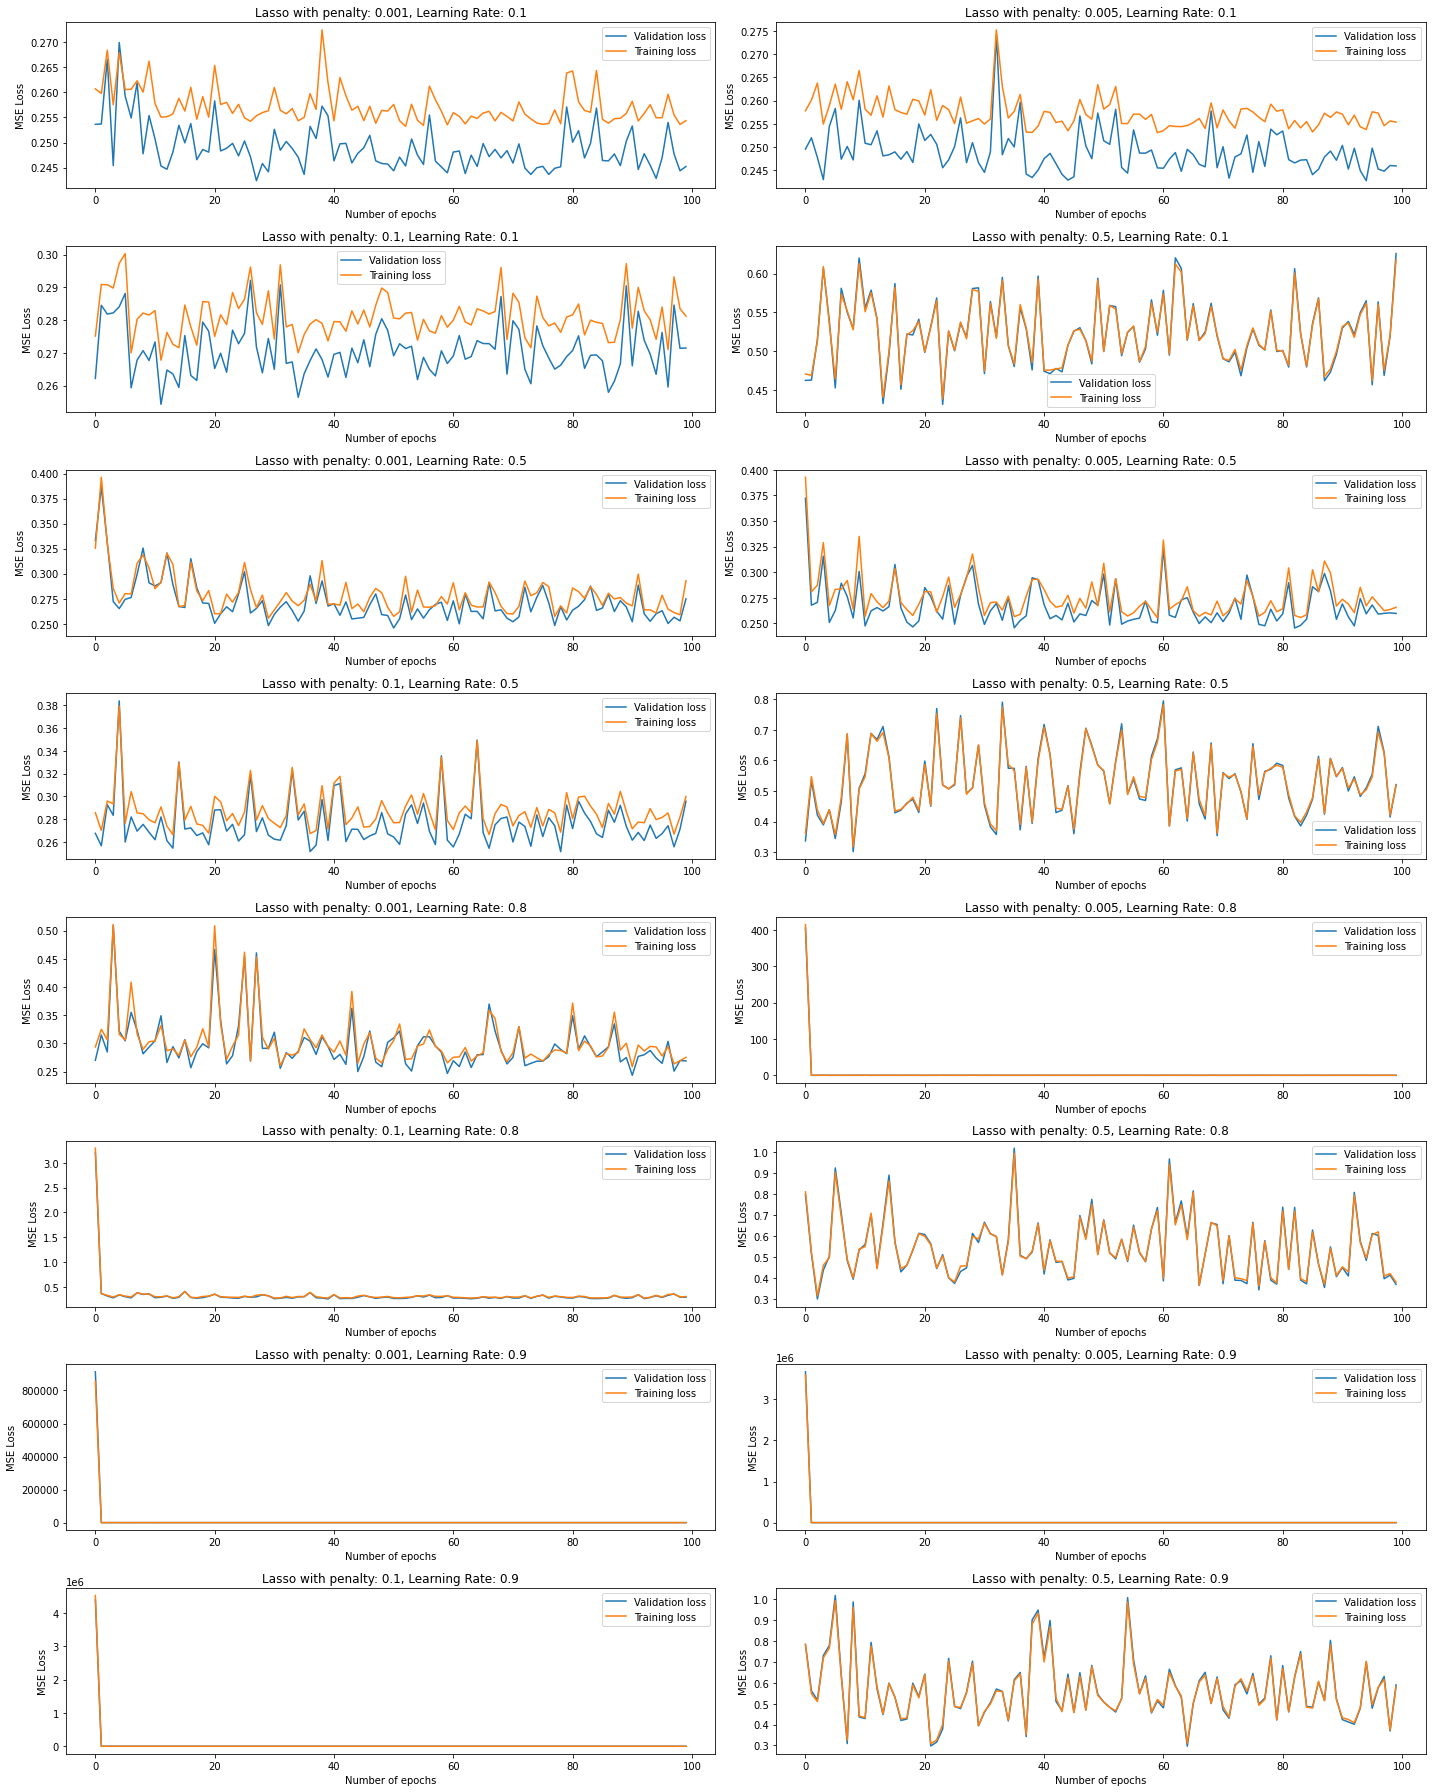

{'loss': 0.2452330819496322, 'Penalty': 0.001, 'learning rate': 0.1, 'penalty': 'lasso'}


In [550]:
minloss=100
bestlinearmodel={}
penalty = [0.001, 0.005, 0.1, 0.5]
learning_rate = [0.1,0.5,0.8,0.9]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 25))
for ii, learning in enumerate(learning_rate):
    print("For learning rate," + str(learning))
    for i, pen in enumerate(penalty):
        train_loss, val_loss = regularization(x_train, np.ravel(y_train),x_val,np.ravel(y_val), pen, learning, penalty = "l1")
        row = ii * 2 + i // 2
        col = i % 2
        if val_loss[-1]<minloss:
            minloss=val_loss[-1]
            bestlinearmodel={"loss":minloss,"Penalty": pen, "learning rate": learning,"penalty": "lasso"}
        
        axes[row, col].plot(range(len(val_loss)), val_loss, label="Validation loss")
        axes[row, col].plot(range(len(train_loss)), train_loss,label="Training loss")
        axes[row, col].set_xlabel("Number of epochs")
        axes[row, col].set_ylabel("MSE Loss")
        axes[row, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        #axes[0, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        axes[row, col].legend()

plt.tight_layout()
plt.show()
print(bestlinearmodel)

For learning rate,0.1
For learning rate,0.5
For learning rate,0.8
For learning rate,0.9


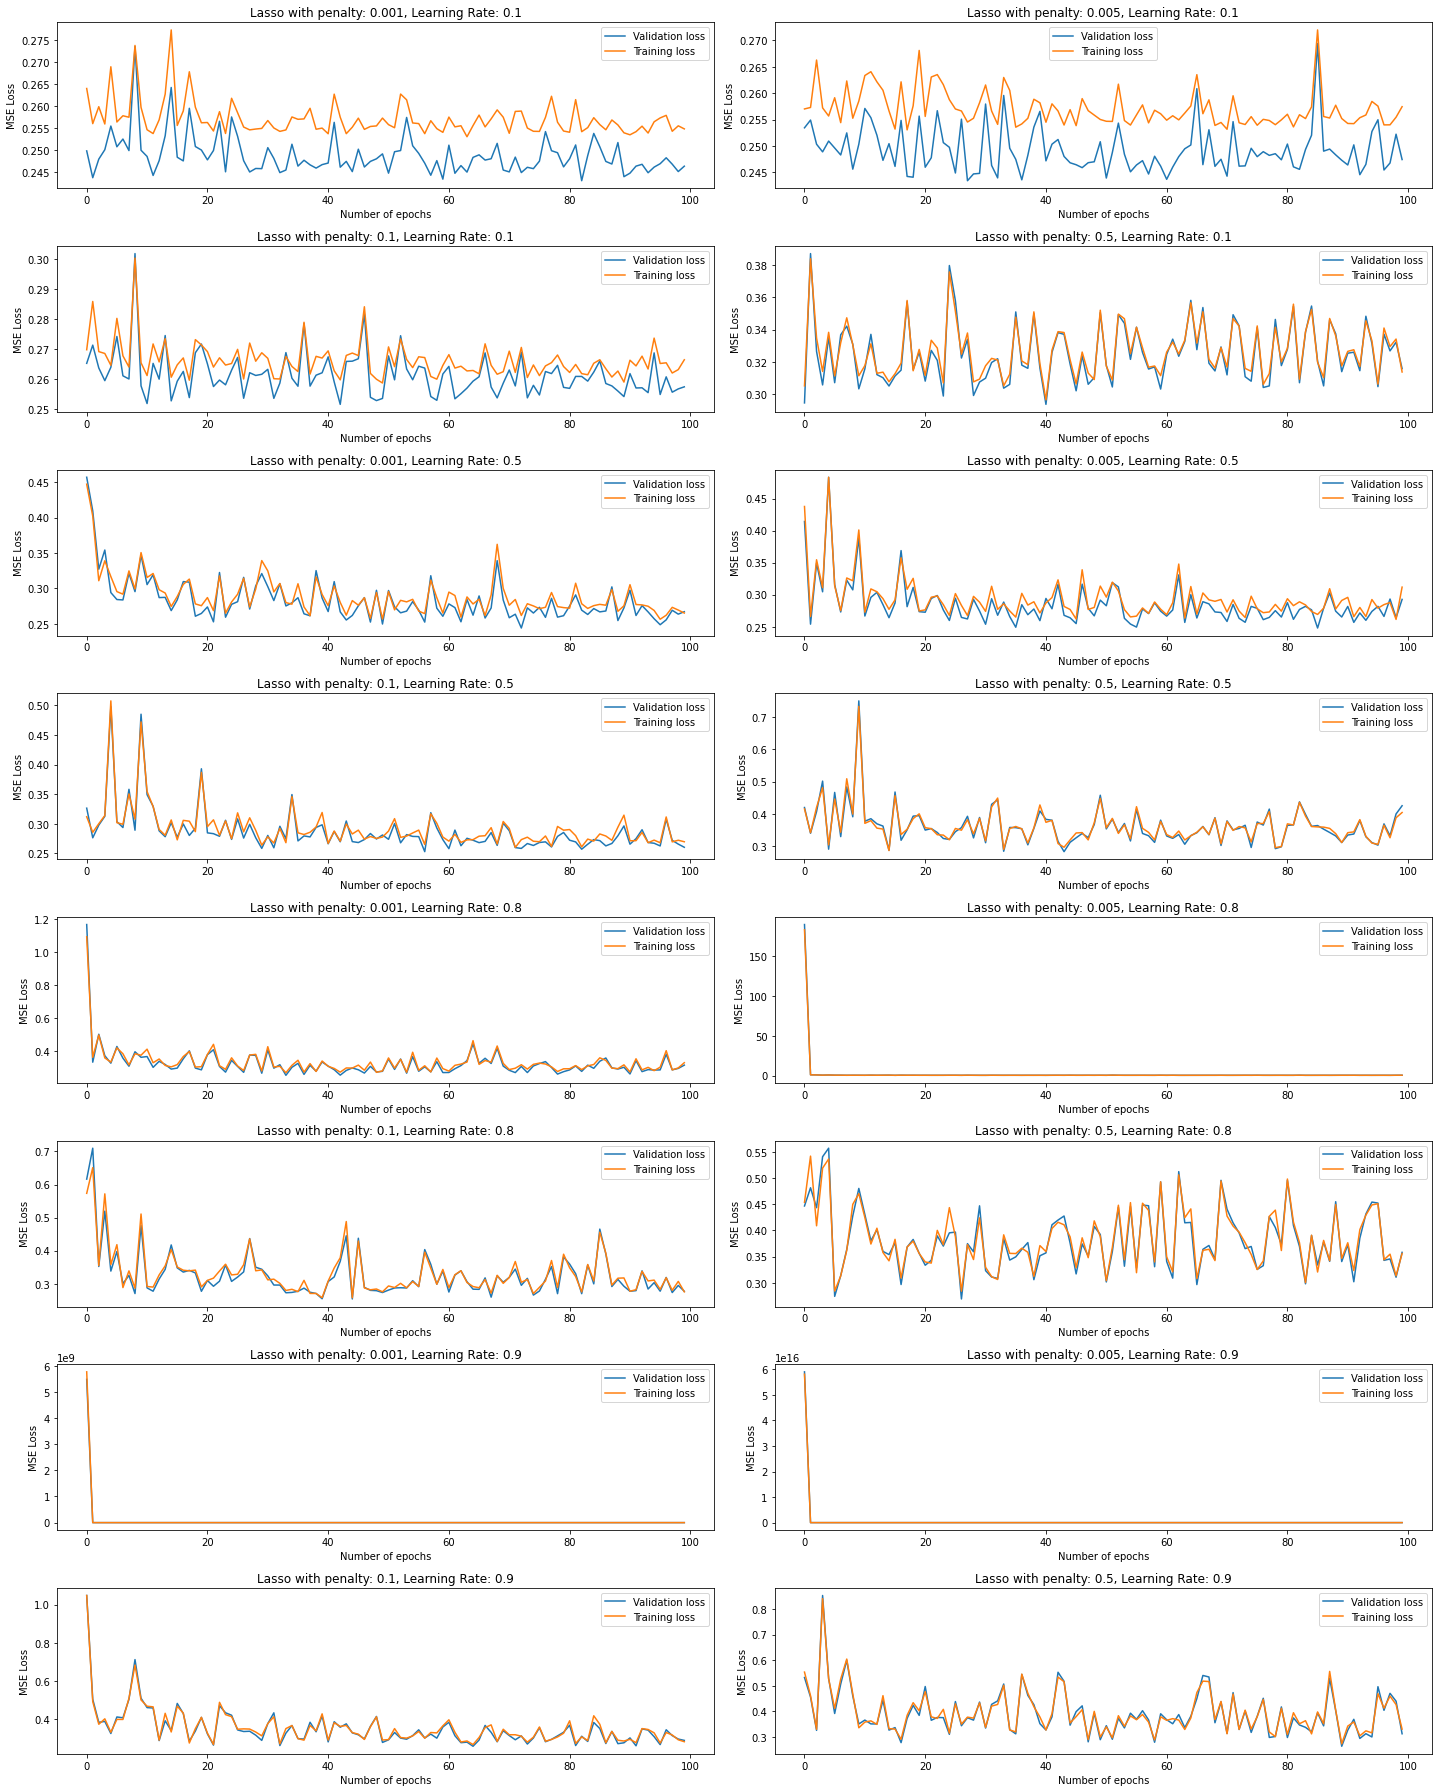

{'loss': 0.2452330819496322, 'Penalty': 0.001, 'learning rate': 0.1, 'penalty': 'lasso'}


In [551]:

penalty = [0.001, 0.005, 0.1, 0.5]
learning_rate = [0.1,0.5,0.8,0.9]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 25))
for ii, learning in enumerate(learning_rate):
    print("For learning rate," + str(learning))
    for i, pen in enumerate(penalty):
        train_loss, val_loss = regularization(x_train, np.ravel(y_train),x_val,np.ravel(y_val), pen, learning, penalty = "l2")
        
        if val_loss[-1]<minloss:
            minloss=val_loss[-1]
            bestlinearmodel={"loss":minloss,"Penalty": pen, "learning rate": learning,"penalty": "Ridge"}
        
        row = ii * 2 + i // 2
        col = i % 2
        axes[row, col].plot(range(len(val_loss)), val_loss, label="Validation loss")
        axes[row, col].plot(range(len(train_loss)), train_loss,label="Training loss")
        axes[row, col].set_xlabel("Number of epochs")
        axes[row, col].set_ylabel("MSE Loss")
        axes[row, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        #axes[0, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        axes[row, col].legend()

plt.tight_layout()
plt.show()
print(bestlinearmodel)

For learning rate,0.1
For learning rate,0.5
For learning rate,0.8
For learning rate,0.9


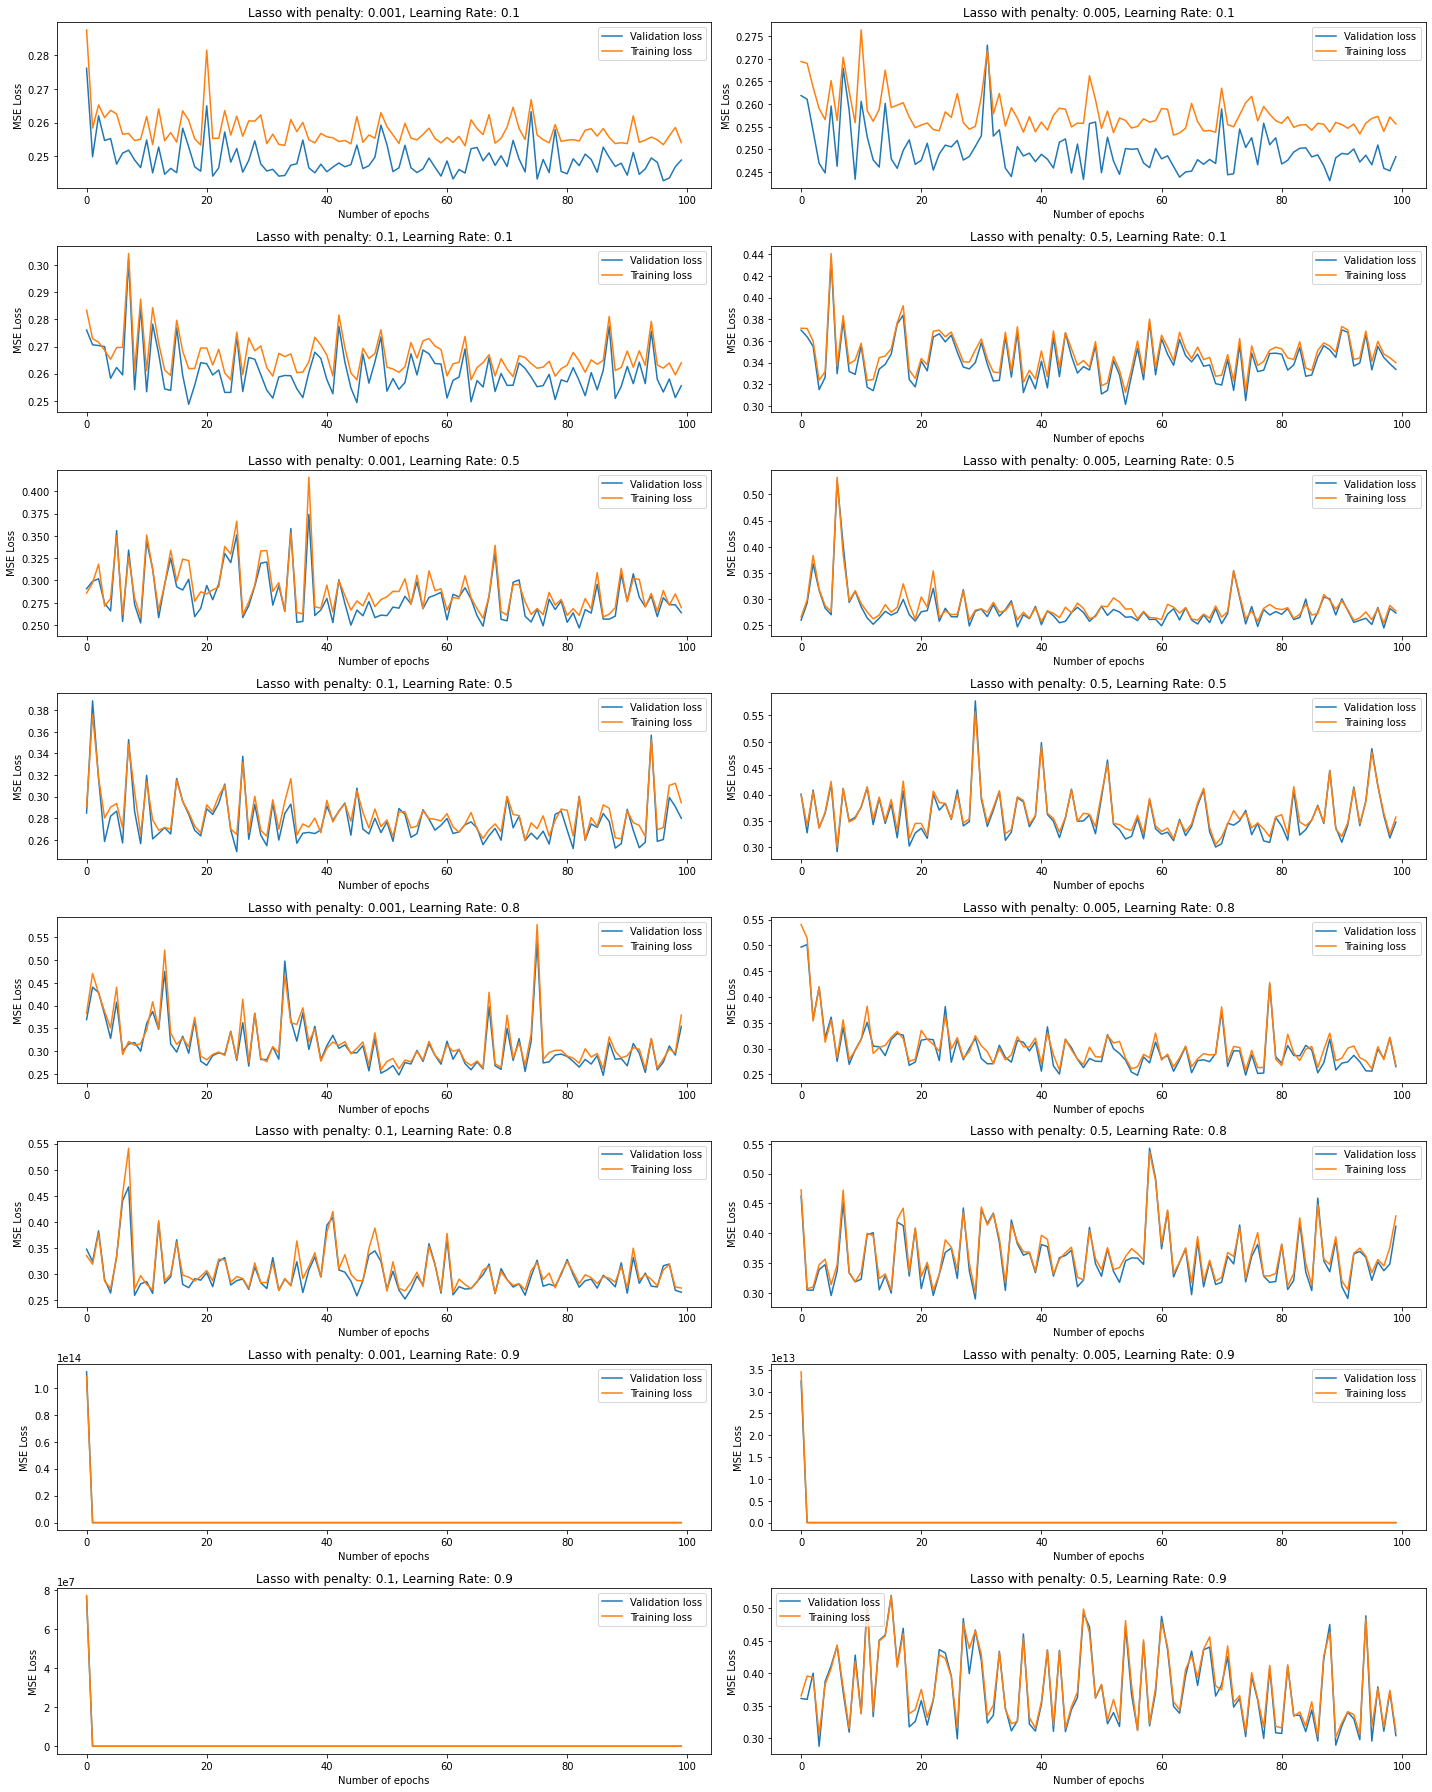

{'loss': 0.2452330819496322, 'Penalty': 0.001, 'learning rate': 0.1, 'penalty': 'lasso'}


In [552]:
penalty = [0.001, 0.005, 0.1, 0.5]
learning_rate = [0.1,0.5,0.8,0.9]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 25))
for ii, learning in enumerate(learning_rate):
    print("For learning rate," + str(learning))
    for i, pen in enumerate(penalty):
        train_loss, val_loss = regularization(x_train, np.ravel(y_train),x_val,np.ravel(y_val), pen, learning, penalty = "elasticnet")
        
        if val_loss[-1]<minloss:
            minloss=val_loss[-1]
            bestlinearmodel={"loss":minloss,"Penalty": pen, "learning rate": learning,"penalty": "elasticnet"}
        
        row = ii * 2 + i // 2
        col = i % 2
        axes[row, col].plot(range(len(val_loss)), val_loss, label="Validation loss")
        axes[row, col].plot(range(len(train_loss)), train_loss,label="Training loss")
        axes[row, col].set_xlabel("Number of epochs")
        axes[row, col].set_ylabel("MSE Loss")
        axes[row, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        #axes[0, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        axes[row, col].legend()

plt.tight_layout()
plt.show()
print(bestlinearmodel)

### Lasso Regularization (penalty=0.001, learningrate=0.1) performs the best simple linear regression

In [553]:
def regularization(x_train, y_train,x_test,y_test, alpha, learning_rate, num_folds=4, num_iterations=100, penalty=None):
    
    
    model = SGDRegressor(penalty=penalty, eta0 = learning_rate, alpha=alpha, max_iter=num_iterations, warm_start=True)
    model.fit(x_train, y_train)
    pred_test = model.predict(x_test)
    
    test_error=np.sqrt(mean_squared_error(pred_test, y_test))
    return test_error



# for lasso
lasso_test_error=regularization(x_train, np.ravel(y_train),x_test,np.ravel(y_test), 0.001, 0.1, num_folds=4, num_iterations=100, penalty="l1")
print("RMSE lasso test error", lasso_test_error)




RMSE lasso test error 0.5266980094749572


## F. Polynomial Regression

In [622]:
#################################3

# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("happiness_data.csv")
df.drop(["year","Life Ladder","Country name"], axis= 1, inplace= True)

df.dropna(how='any', inplace=True)

df = df[df['Social support'] >=0.45]
df = df[df['Healthy life expectancy at birth'] >= 45]
df = df[df['Healthy life expectancy at birth'] <= 75]
df = df[df['Freedom to make life choices'] >= 0.4]
df = df[df['Generosity'] <= 0.4]
df = df[df['Perceptions of corruption'] >= 0.2]
df = df[df['Positive affect'] >= 0.45]
df = df[df['Positive affect'] <= 0.9]
df = df[df['Negative affect'] >= 0.1]
df = df[df['Negative affect'] <= 0.5]

# df = pd.get_dummies(df, columns=["Country name"])

x = df.drop(['Healthy life expectancy at birth'], axis=1).values
y = df['Healthy life expectancy at birth'].values

# Normalize/Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

kf = KFold(n_splits=4)

mse=[]
# Divide the data into 4 folds
for train_index, val_index in kf.split(df_scaled):
    X_train, X_val = df_scaled[train_index], df_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]
    # Fit a linear regression model using normal equation/SVD
    poly = PolynomialFeatures(degree=3)
    poly_features = poly.fit_transform(X_train)
    poly_test_features = poly.fit_transform(X_val)
    regression_model = LinearRegression()
    #print(poly_features.shape, y.shape)
    regression_model.fit(poly_features, y_train)
    y_pred = regression_model.predict(poly_test_features)
    mse.append(mean_squared_error(y_val, y_pred))

np.sqrt(mse[-1])


4.4365990835718953e-14

In [623]:
df.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0               7.370           0.451                             50.80   
1               7.540           0.552                             51.20   
2               7.647           0.539                             51.60   
3               7.620           0.521                             51.92   
4               7.705           0.521                             52.24   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.718       0.168                      0.882   
1                         0.679       0.190                      0.850   
2                         0.600       0.121                      0.707   
3                         0.496       0.162                      0.731   
4                         0.531       0.236                      0.776   

   Positive affect  Negative affect  
0            0.518            0.258  
1            0.584            0.237  
2            0.618            0.275  
3            0.611            0.267  
4            0.710            0.268

In [624]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score


# x=scaler.fit(x)
x = df.values
x = scale(x)
y = scale(y)

# x: input data matrix
# y: target data 


#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)

In [626]:
# generate polynomial features
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

# fit a linear regression model to the polynomial features
reg = LinearRegression().fit(x_poly, y_train)

# make predictions using the fitted model
x_val_poly = poly.transform(x_val)


scores = cross_val_score(reg, x_val_poly, y_val, cv=5, scoring='neg_mean_squared_error')
val_loss = -np.mean(scores)

print('Validation loss:', val_loss)


Validation loss: 1.9482782775061713e-29


### Polynomial regression SVD

1.0991133708632828e-14


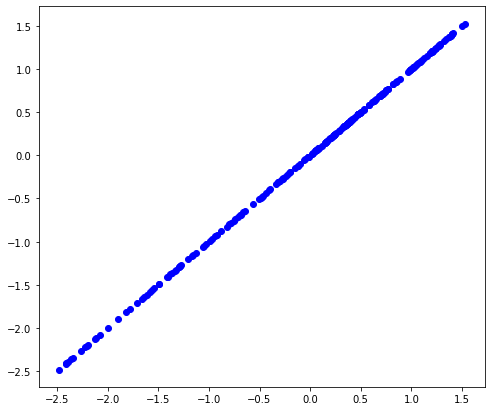

In [627]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 7

U, S, V = np.linalg.svd(x_poly, full_matrices=False)

# The pseudo inverse of X_poly
x_pinv = V.T @ np.diag(1/S) @ U.T

# Find the coefficients of the polynomial regression
coef = x_pinv @ y_train

# Make predictions for new data


y_pred = x_val_poly @ coef
print(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.scatter(y_val, y_pred, color='blue')
# plt.scatterplot(x_test_poly, y_pred, color='red')
plt.show()

### Polynomial regression with SGD

MSE:  0.001627438976261048
Validation loss: 0.009022066569300564


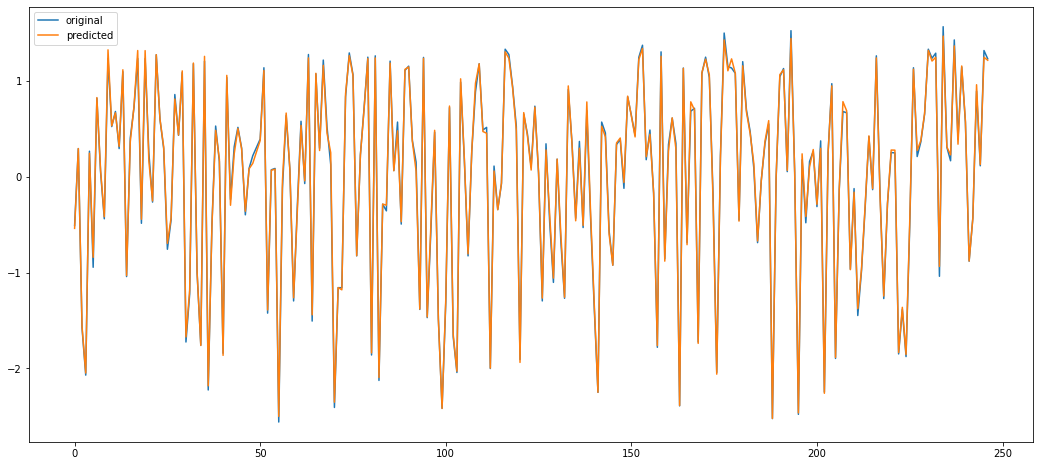

In [563]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor( max_iter=1000,tol=0.0001,penalty=None)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
x_val_poly = poly.fit_transform(x_val)
sgdr.fit(x_poly, y_train)

ypred = sgdr.predict(x_val_poly)

mse = mean_squared_error(y_val, ypred)
print("MSE: ", np.square(mse))


scores = cross_val_score(sgdr, x_val_poly, y_val, cv=5, scoring='neg_mean_squared_error')
val_loss = -np.mean(scores)
print('Validation loss:', np.sqrt(val_loss))



plt.rcParams['figure.figsize'] = 18, 8
x_ax = range(len(y_val))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, ypred, label="predicted")


plt.legend()
plt.show()

As we can see the data doesnt overfit on this polynomial features

### Polynomial with Lasso, Ridge and elastic net for different penalty scores

For learning rate,0.1
For learning rate,0.5
For learning rate,0.8
For learning rate,0.9


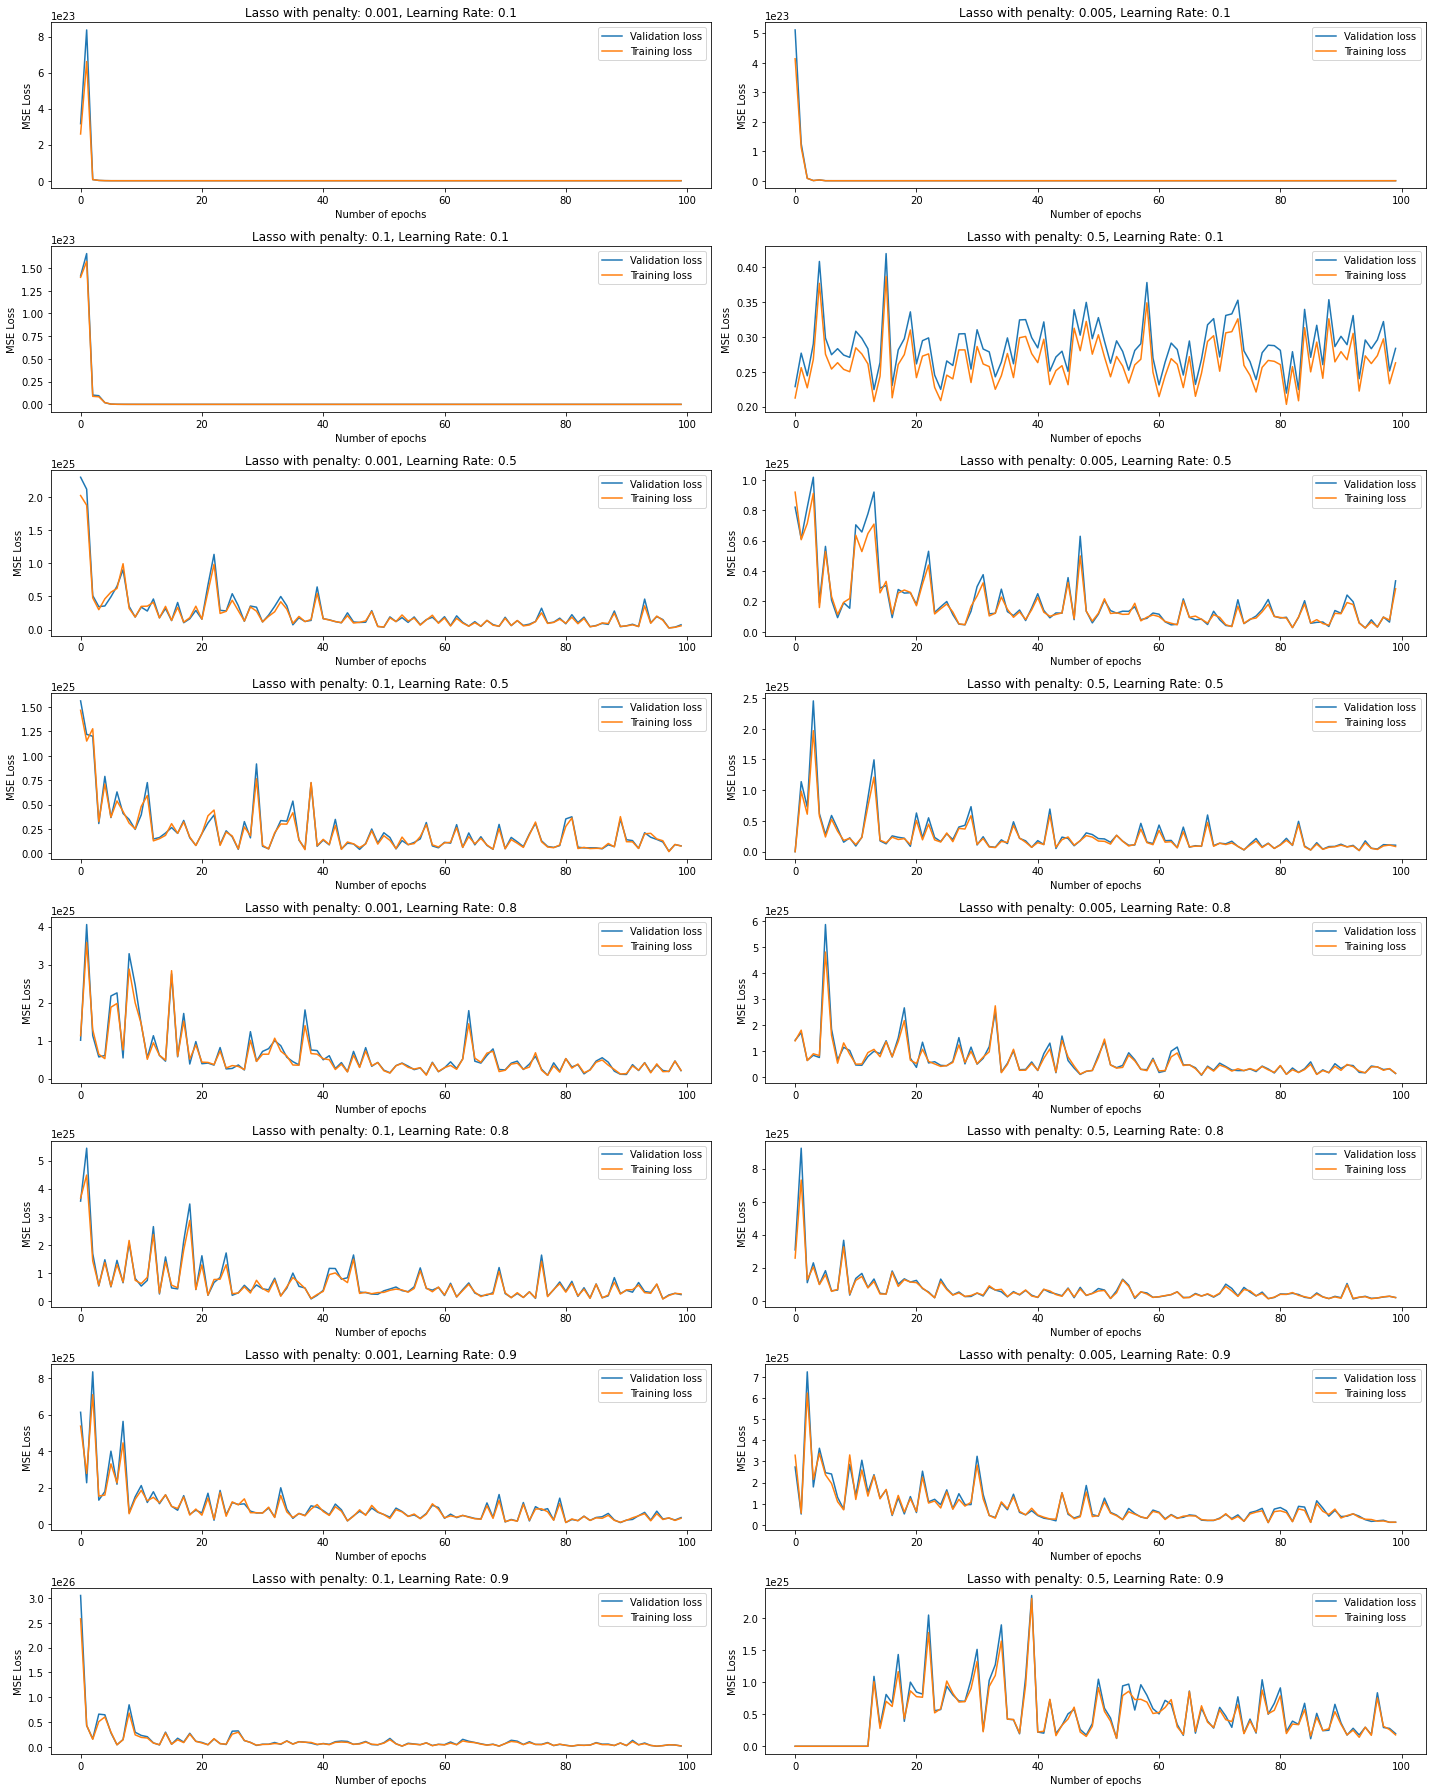

{'loss': 0.28359609301578664, 'Penalty': 0.5, 'learning rate': 0.1, 'penalty': 'Lasso'}


In [565]:


def regularization(x_train, y_train, x_val, y_val ,alpha, learning_rate, num_folds=4, num_iterations=100, penalty=None):
    
    y_train = np.ravel(y_train)
    y_val = np.ravel(y_val)
    model = SGDRegressor(penalty=penalty, eta0 = learning_rate, alpha=alpha, max_iter=num_iterations, warm_start=True)
    train_loss = []
    val_loss = []
    iteration = []
    for i in range(num_iterations):
        #X_train, y_train = shuffle(X_train,y_train)
        model.partial_fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_val = model.predict(x_val)
        train_loss.append(mean_squared_error(pred_train, y_train))
        val_loss.append(mean_squared_error(pred_val, y_val))
        iteration.append(i)
    return np.sqrt(train_loss), np.sqrt(val_loss)

minloss=100
bestpolymodel={}
penalty = [0.001, 0.005, 0.1, 0.5]
learning_rate = [0.1,0.5,0.8,0.9]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 25))
for ii, learning in enumerate(learning_rate):
    print("For learning rate," + str(learning))
    for i, pen in enumerate(penalty):
        train_loss, val_loss = regularization(x_poly, y_train,x_val_poly, y_val, pen, learning, penalty = "l1")
        
        if val_loss[-1]<minloss:
            minloss=val_loss[-1]
            bestpolymodel={"loss":minloss,"Penalty": pen, "learning rate": learning,"penalty": "Lasso"}
        
        row = ii * 2 + i // 2
        col = i % 2
        axes[row, col].plot(range(len(val_loss)), val_loss, label="Validation loss")
        axes[row, col].plot(range(len(train_loss)), train_loss,label="Training loss")
        axes[row, col].set_xlabel("Number of epochs")
        axes[row, col].set_ylabel("MSE Loss")
        axes[row, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        #axes[0, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        axes[row, col].legend()

plt.tight_layout()
plt.show()
print(bestpolymodel)


For learning rate,0.1
For learning rate,0.5
For learning rate,0.8
For learning rate,0.9


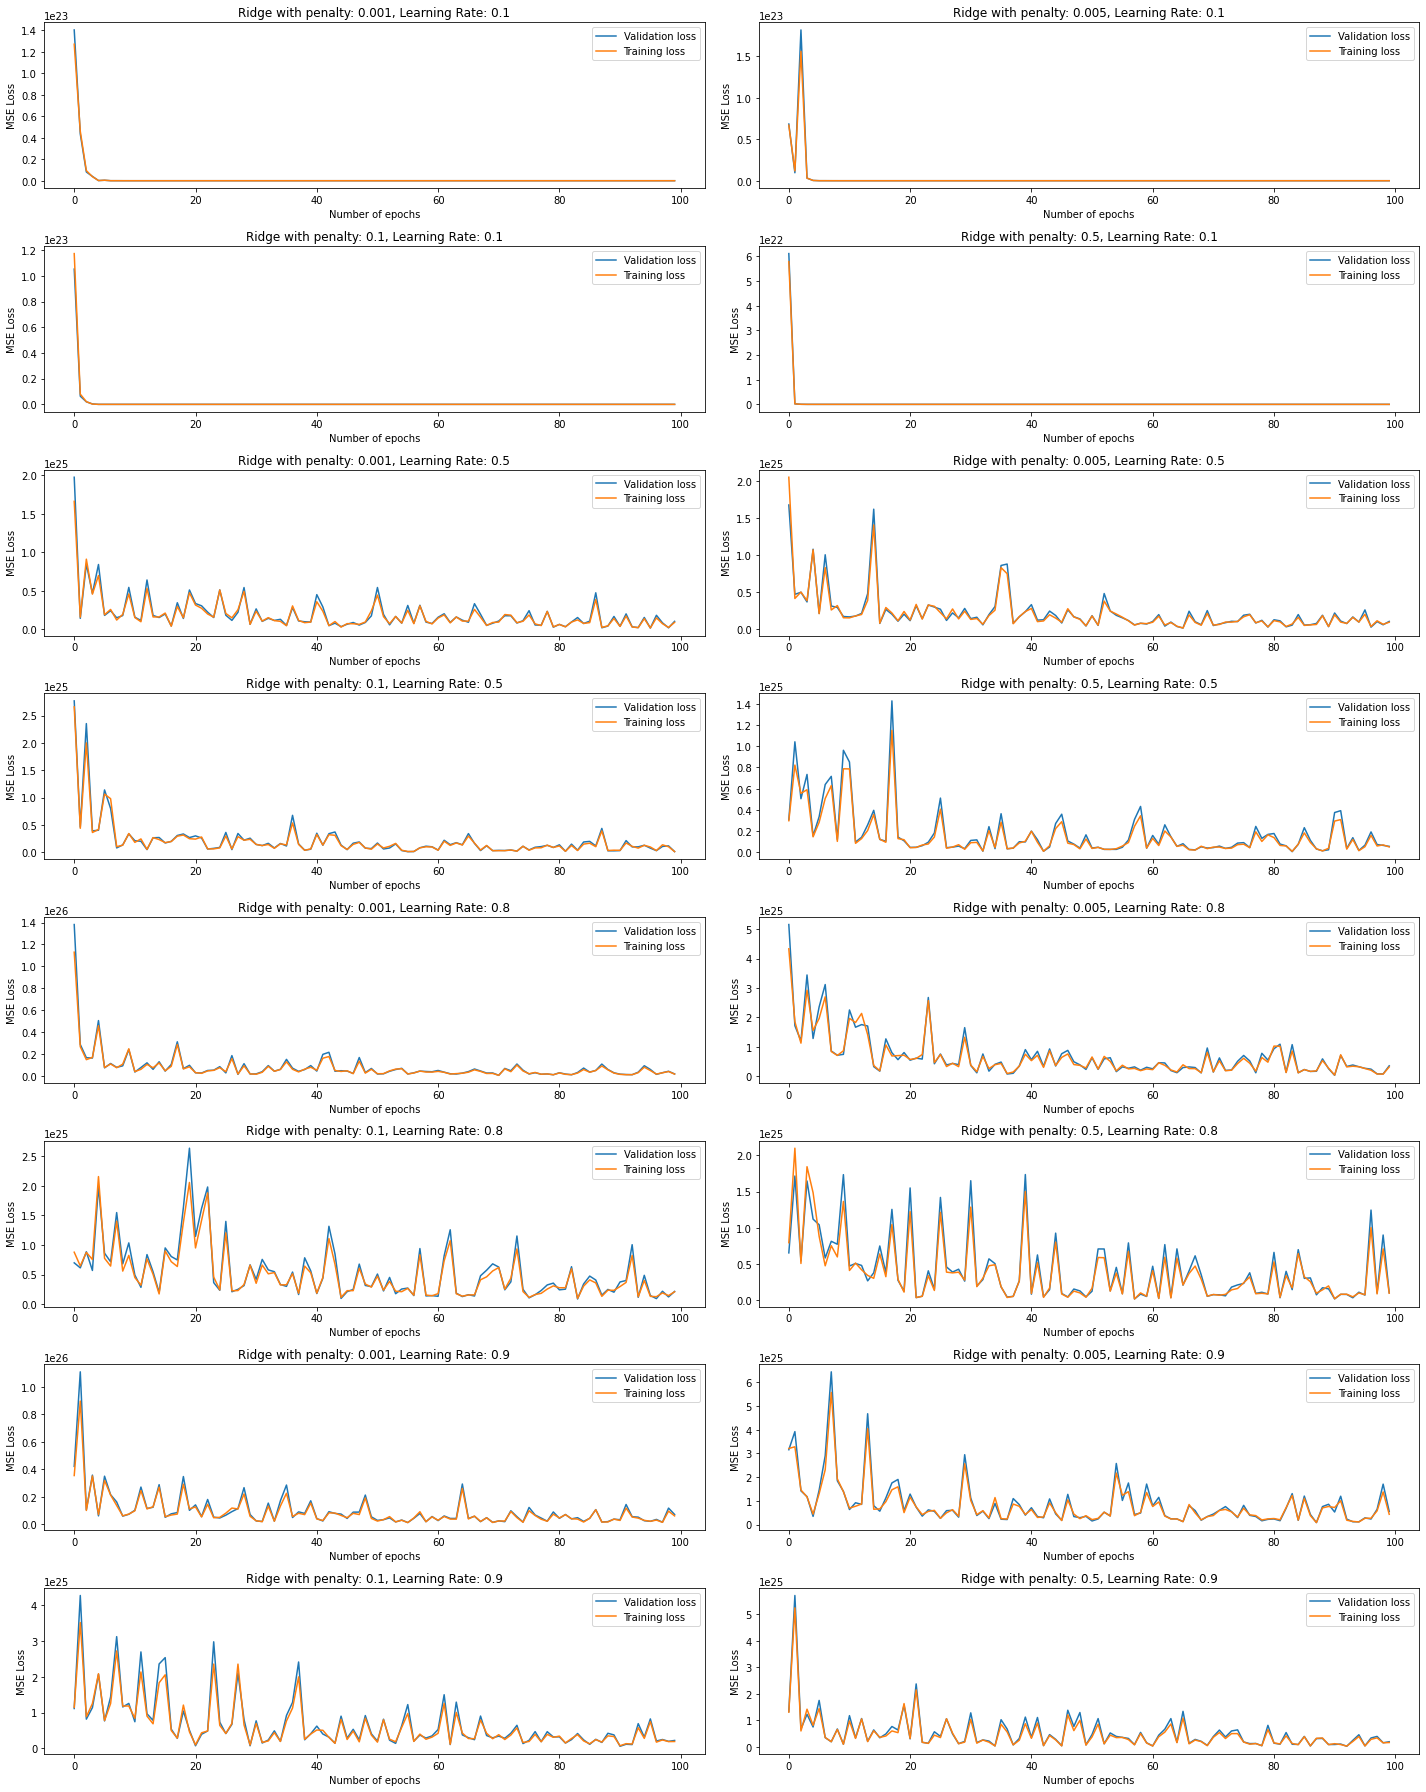

{'loss': 0.02301635867665691, 'Penalty': 0.1, 'learning rate': 0.1, 'penalty': 'Ridge'}


In [566]:
penalty = [0.001, 0.005, 0.1, 0.5]
learning_rate = [0.1,0.5,0.8,0.9]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 25))
for ii, learning in enumerate(learning_rate):
    print("For learning rate," + str(learning))
    for i, pen in enumerate(penalty):
        train_loss, val_loss = regularization(x_poly, y_train,x_val_poly, y_val, pen, learning, penalty = "l2")
        
        if val_loss[-1]<minloss:
            minloss=val_loss[-1]
            bestpolymodel={"loss":minloss,"Penalty": pen, "learning rate": learning,"penalty": "Ridge"}
        
        row = ii * 2 + i // 2
        col = i % 2
        axes[row, col].plot(range(len(val_loss)), val_loss, label="Validation loss")
        axes[row, col].plot(range(len(train_loss)), train_loss,label="Training loss")
        axes[row, col].set_xlabel("Number of epochs")
        axes[row, col].set_ylabel("MSE Loss")
        axes[row, col].set_title(f"Ridge with penalty: {pen}, Learning Rate: {learning}")
        #axes[0, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        axes[row, col].legend()

plt.tight_layout()
plt.show()
print(bestpolymodel)

For learning rate,0.1
For learning rate,0.5
For learning rate,0.8
For learning rate,0.9


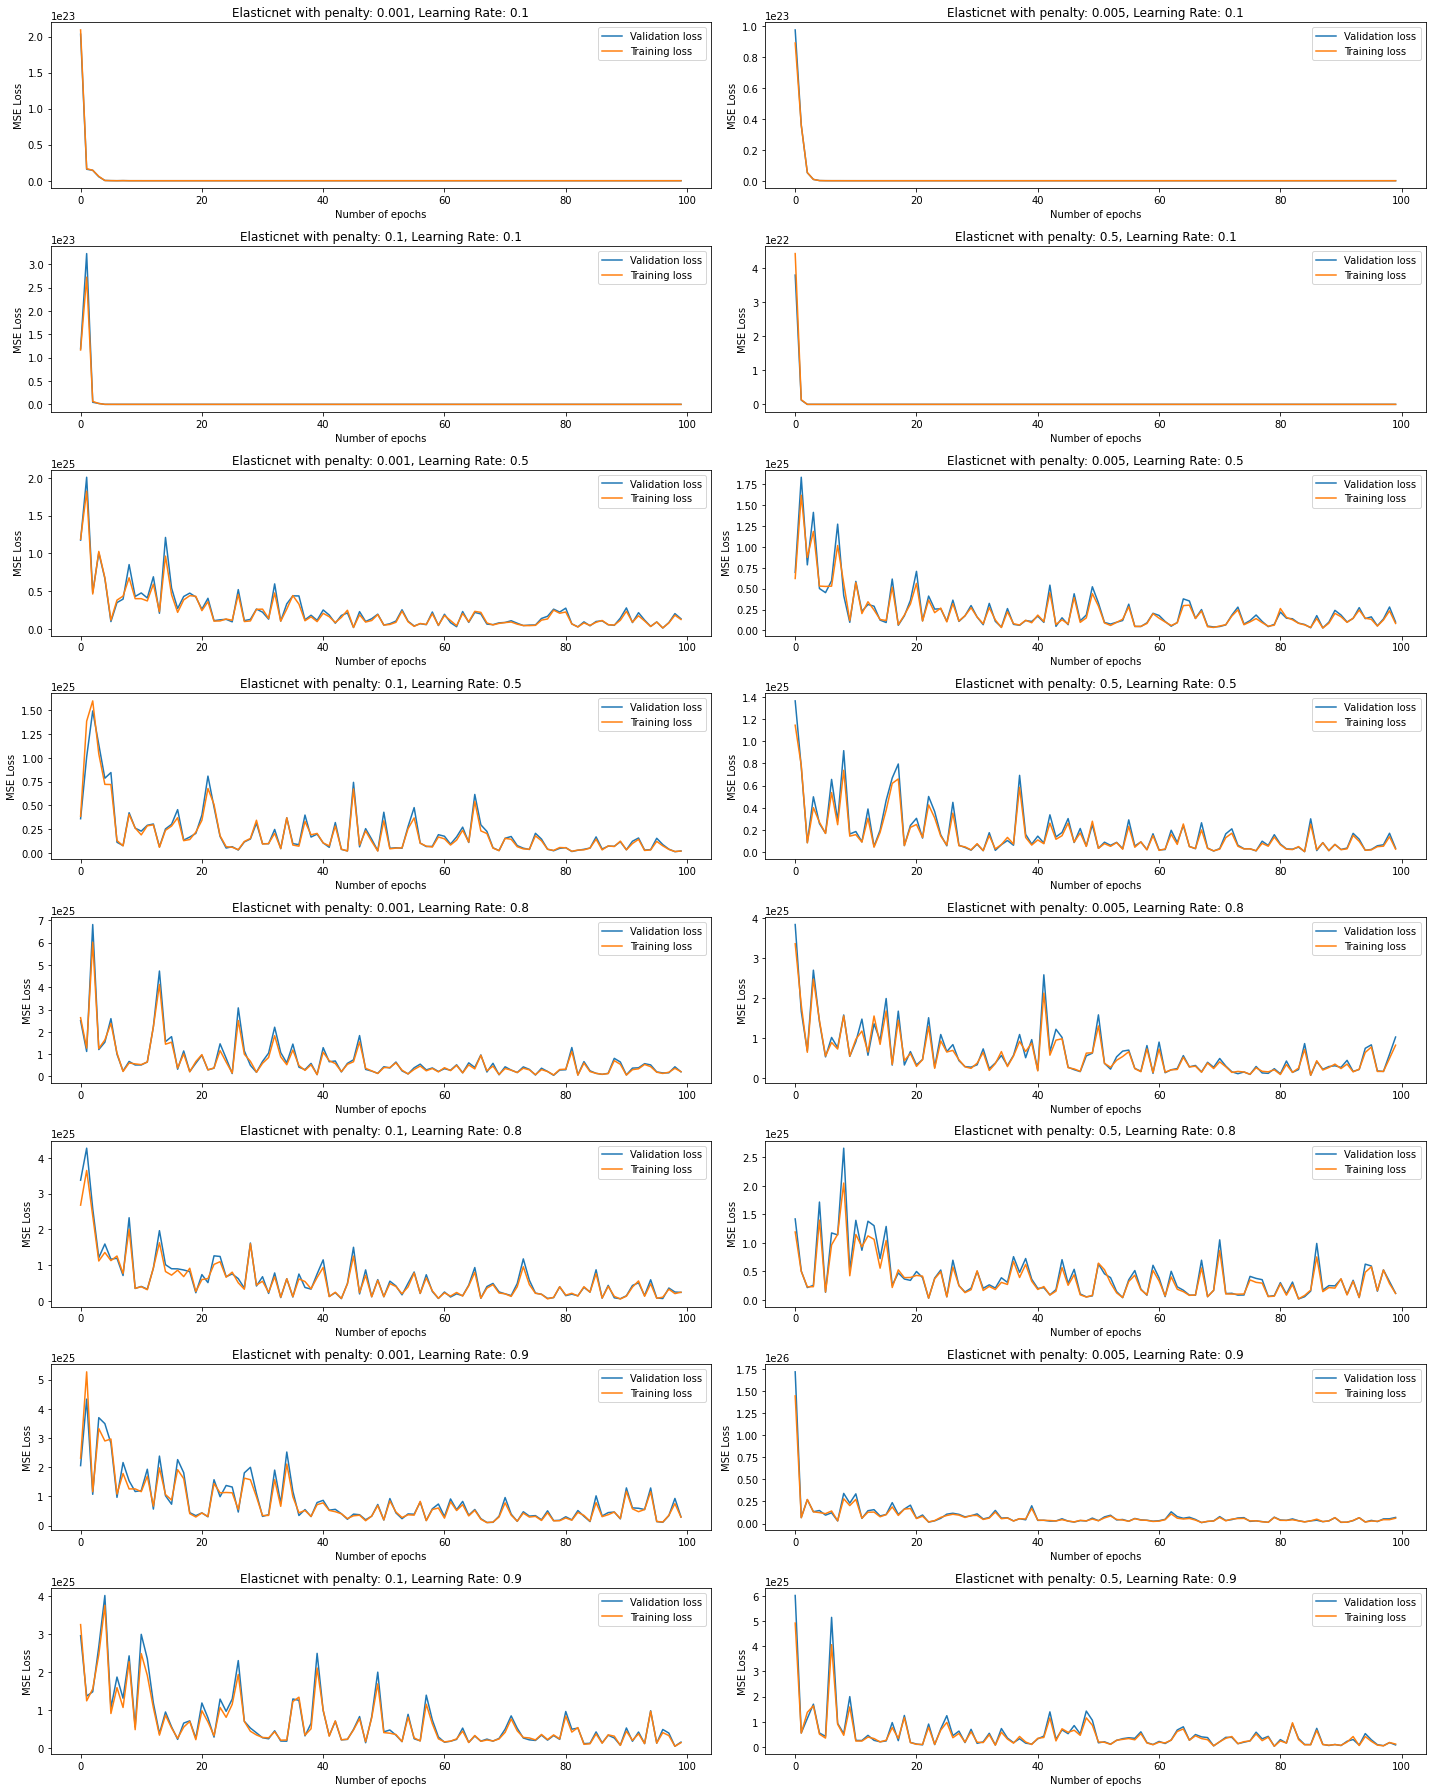

{'loss': 0.01680435614635605, 'Penalty': 0.1, 'learning rate': 0.1, 'penalty': 'Elasticnet'}


In [567]:
penalty = [0.001, 0.005, 0.1, 0.5]
learning_rate = [0.1,0.5,0.8,0.9]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 25))
for ii, learning in enumerate(learning_rate):
    print("For learning rate," + str(learning))
    for i, pen in enumerate(penalty):
        train_loss, val_loss = regularization(x_poly, y_train,x_val_poly, y_val, pen, learning, penalty = "elasticnet")
        
        if val_loss[-1]<minloss:
            minloss=val_loss[-1]
            bestpolymodel={"loss":minloss,"Penalty": pen, "learning rate": learning,"penalty": "Elasticnet"}
        
        row = ii * 2 + i // 2
        col = i % 2
        axes[row, col].plot(range(len(val_loss)), val_loss, label="Validation loss")
        axes[row, col].plot(range(len(train_loss)), train_loss,label="Training loss")
        axes[row, col].set_xlabel("Number of epochs")
        axes[row, col].set_ylabel("MSE Loss")
        axes[row, col].set_title(f"Elasticnet with penalty: {pen}, Learning Rate: {learning}")
        #axes[0, col].set_title(f"Lasso with penalty: {pen}, Learning Rate: {learning}")
        axes[row, col].legend()

plt.tight_layout()
plt.show()
print(bestpolymodel)

###  Elasticnet Regularization (penalty=0.1, learningrate 0.1) performs the best for polynomial regression

In [568]:
x_test_poly = poly.fit_transform(x_test)

def regularization(x_train, y_train, x_test, y_test ,alpha, learning_rate, num_folds=4, num_iterations=100, penalty=None):
    
    y_train = np.ravel(y_train)
    
    model = SGDRegressor(penalty=penalty, eta0 = learning_rate, alpha=alpha, max_iter=num_iterations, warm_start=True)
    model.fit(x_train, y_train)
    pred_test = model.predict(x_test)
    
    test_error=np.sqrt(mean_squared_error(pred_test, y_test))
    return np.sqrt(test_error)




# for Elastic
elasticnet_test_error=regularization(x_poly, y_train,x_test_poly, y_test, 0.1, 0.1, num_folds=4, num_iterations=100, penalty="elasticnet")
print("RMSE Elasticnet test error", elasticnet_test_error)



RMSE Elasticnet test error 0.1140237799397829


## H.Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

1. Out of the big volume of data, we first examine different columns and the stats. We remove the null values as they are very less and on the bases of histograms, we remove the outliers of some features

2. We look for categorical values, and using dummies function we convert the categorical variable (country name) to numerical entity (one hot encoding) and we remove the other category feature- year 

3. After looking for correlations using heatmaps and pearson values we decide the columns that are important and remove the ones that does not affect the results of life expectancy

4. After the data cleaning process, we analyse the data with various regression algorithms and based on the graphs and mean squared error values we decide if our model overfits or underfits or is best fit.

5. We play with the parameters of polynomial degrees and, iterations and stopping parameters in SGDS to evaluate the best fit for the data with least error. 

6. In polynomial regression we find the model overfitting for different degrees.However when we use SGD, the model seems to work fine

6. The graphs that were generated from the results of data and regression models, evaluates the results and supports our convention that model we have used neither underfits or overfits the data.

7. The best results is given by the ridge regression with penalty point 1 for linear fitting.

